In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [74]:
custom_palette = ["#808080", "#FF0000", "#000000"]

# Apply Seaborn Style
sns.set_style("darkgrid")  # Choose from: white, dark, whitegrid, darkgrid, ticks
sns.set_palette(custom_palette)

# Apply Matplotlib Customizations
plt.rcParams.update({
    'font.family': 'Georgia',  # Set font to Georgia
    'font.size': 14,           # Font size 14
    'font.weight': 'bold',      # Bold font
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.edgecolor': "#000000",  # Black edges
    'axes.facecolor': "#F5F5F5",  # Light grey background
    'grid.color': "#D3D3D3",      # Light grey gridlines
    'text.color': "#000000",      # Black text
})


In [3]:
df = pd.read_csv('C:/Users/XXXX/Downloads/DK_assgn/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
df.shape

(181458, 17)

In [6]:
df.info

<bound method DataFrame.info of         VIN (1-10)    County            City State  Postal Code  Model Year  \
0       WAUTPBFF4H      King         Seattle    WA      98126.0        2017   
1       WAUUPBFF2J  Thurston         Olympia    WA      98502.0        2018   
2       5YJSA1E22H  Thurston           Lacey    WA      98516.0        2017   
3       1C4JJXP62M  Thurston          Tenino    WA      98589.0        2021   
4       5YJ3E1EC9L    Yakima          Yakima    WA      98902.0        2020   
...            ...       ...             ...   ...          ...         ...   
181453  50EA1TEA7P   Douglas  East Wenatchee    WA      98802.0        2023   
181454  1C4JJXP60N   Spokane  Spokane Valley    WA      99206.0        2022   
181455  5YJ3E1EA0M      King        Enumclaw    WA      98022.0        2021   
181456  5YJ3E1EC8L     Clark       Vancouver    WA      98682.0        2020   
181457  5YJSA1E27F   Whatcom      Bellingham    WA      98225.0        2015   

         Make     M

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal Code,181455.0,9.817405e+04,2.414242e+03,1.545000e+03,9.805200e+04,9.812200e+04,9.837000e+04,9.957700e+04
Model Year,181458.0,2.020582e+03,2.991140e+00,1.997000e+03,2.019000e+03,2.022000e+03,2.023000e+03,2.024000e+03
Electric Range,181458.0,5.782667e+01,9.139607e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,3.370000e+02
Base MSRP,181458.0,1.040237e+03,8.228989e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,181060.0,2.910690e+01,1.489234e+01,1.000000e+00,1.800000e+01,3.300000e+01,4.200000e+01,4.900000e+01
DOL Vehicle ID,181458.0,2.214128e+08,7.528561e+07,4.385000e+03,1.830687e+08,2.289155e+08,2.561320e+08,4.792548e+08
2020 Census Tract,181455.0,5.297575e+10,1.594876e+09,1.001020e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


In [8]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

## Data Cleaning

In [9]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [10]:
df1=df.dropna()

In [11]:
df1.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [12]:
df1.duplicated().sum()

np.int64(0)

## Analysis

1. Market Trends & Adoption Patterns
a)	What is the total number of electric vehicles (EVs) registered in Washington State?


In [13]:
df_wa=df1[df1.State=='WA']
print(f'The total number of electric vehicles (EVs) registered in Washington State is: {len(df_wa)}')

The total number of electric vehicles (EVs) registered in Washington State is: 181055


b)	How has EV adoption changed over the years (model year trends)?

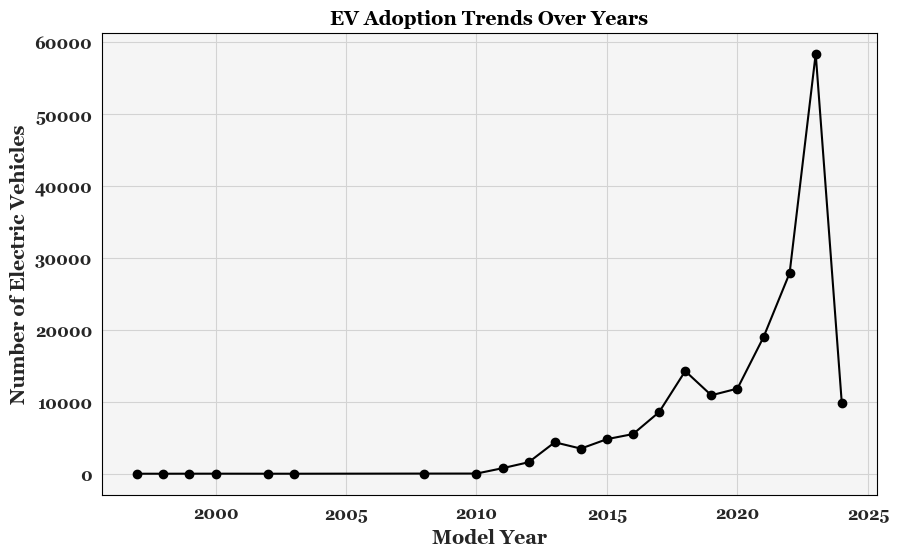

In [66]:
ev_adoption_trends = df1.groupby('Model Year').size().reset_index(name='Number of Vehicles')
plt.figure(figsize=(10, 6))
plt.plot(ev_adoption_trends['Model Year'], ev_adoption_trends['Number of Vehicles'], marker='o',color='black')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('EV Adoption Trends Over Years')
plt.show()


<h2 style=color:red>The trend shows low adoption in the first decade but gets momentum between 2015 and 2020 then spikes with high rate of adoption bwteen and 2020 and 2025. </h2>

c)	Which brands and models are the most popular among EV owners?

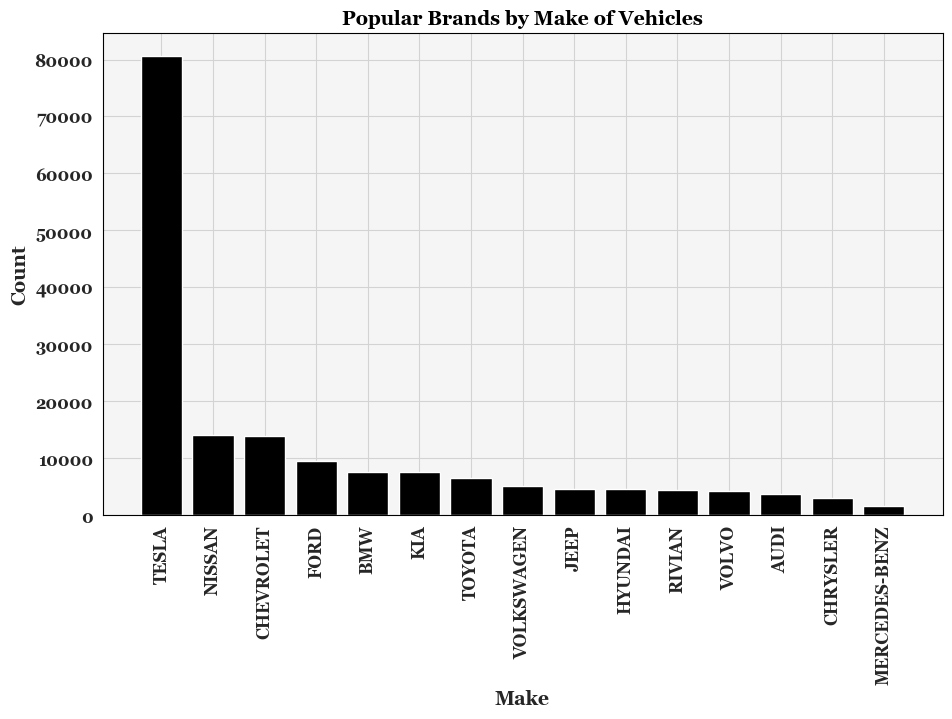

In [67]:
#pop_brand=df1.groupby('Make').size().reset_index()
pop_brand=df1['Make'].value_counts().head(15)
plt.figure(figsize=(10,6))
plt.bar(pop_brand.index,pop_brand.values,color='black')
plt.title('Popular Brands by Make of Vehicles')
plt.xlabel('Make')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<h2 style=color:red>Tesla is the most dominant of the top 15 brands and mercendez is the least popular of the top 15 brands </h2>

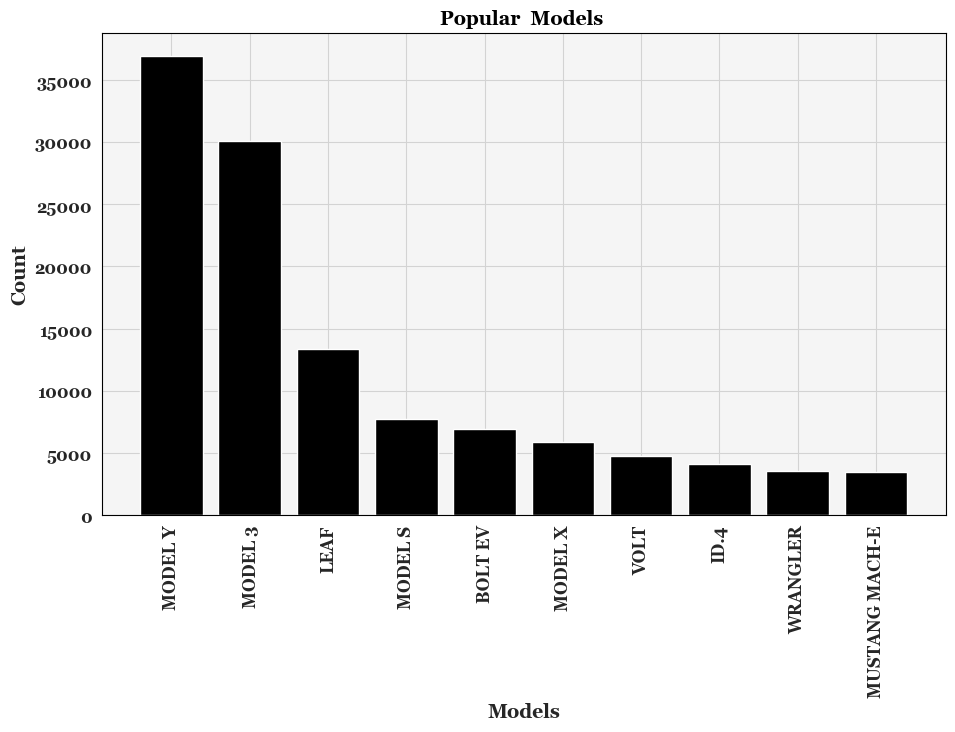

In [68]:
pop_brand=df1['Model'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(pop_brand.index,pop_brand.values,color='black')
plt.title('Popular  Models ')
plt.xlabel('Models')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<h2 style=color:red>The graph shows that MODEL Y is the most popular model and MUSTANG-MACH-E is the least popular model in the top ten models</h2>

In [17]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10


d)	What is the distribution of battery electric vehicles (BEVs) vs. plug-in hybrid electric vehicles (PHEVs)?

C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\3936528554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['Electric Vehicle Type'],data=df1,palette=custom_palette)
C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\3936528554.py:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=df1['Electric Vehicle Type'],data=df1,palette=custom_palette)


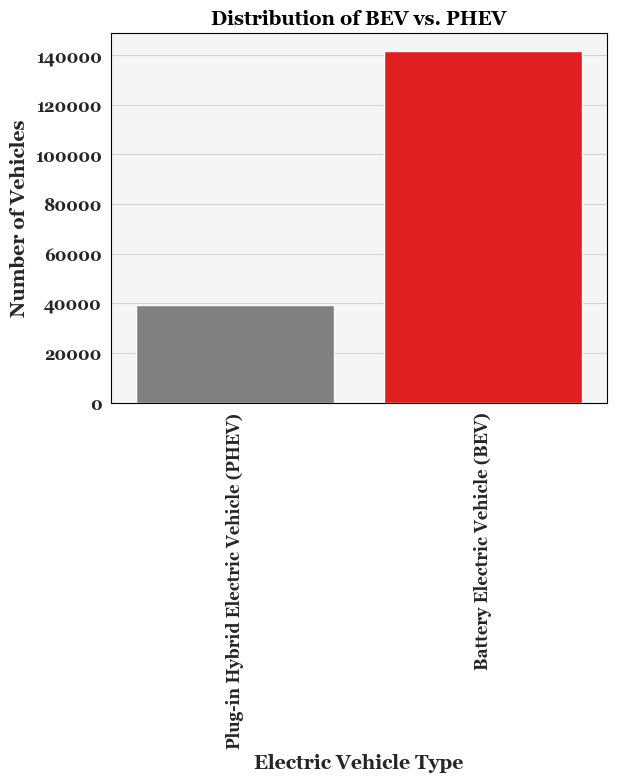

In [57]:
import seaborn as sns
sns.countplot(x=df1['Electric Vehicle Type'],data=df1,palette=custom_palette)
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of BEV vs. PHEV')
plt.xticks(rotation=90)
plt.show()

<h2 style=color:red>Battery Electric vehicle dominates with a higher margin compared to plug in Hybrid electric vehicle</h2>

<h1>2. Vehicle Performance & Range Analysis </h1>


e)	What is the average electric range of EVs in the dataset?

In [19]:
av_erange=df1['Electric Range'].mean()
print(f"Average Electric Range: {av_erange}")

Average Electric Range: 57.80996934633122


f)	Which models offer the longest and shortest electric ranges?

In [20]:
max_range_model=df1.loc[df1['Electric Range'].idxmax()]
min_range_model=df1.loc[df1['Electric Range'].idxmin()]

print(f'{max_range_model['Model']}, has the highest ER of {max_range_model['Electric Range']}')
print(f'{min_range_model['Model']}, has the highest ER of {min_range_model['Electric Range']}')

MODEL S, has the highest ER of 337
EV6, has the highest ER of 0


<h2 style=color:red>Model S has the highest Electrical Range and EV6 has the lowest elctric Range</h2>

g)	Is there a correlation between model year and electric range improvements?

Pearson Correlation Coefficient: -0.4817395919079023
Plotting...


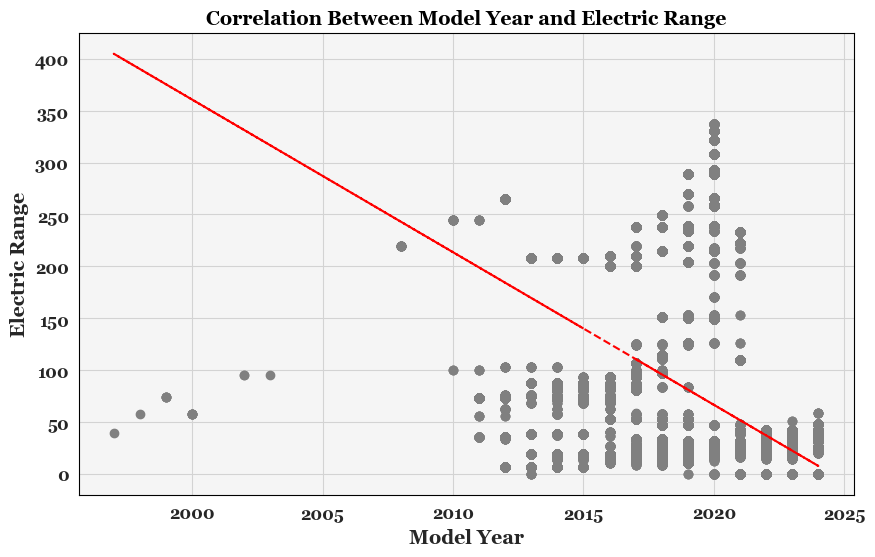

In [80]:

correlation = df1['Model Year'].corr(df1['Electric Range'])

print(f"Pearson Correlation Coefficient: {correlation}")


plt.figure(figsize=(10, 6))
plt.scatter(df1['Model Year'], df1['Electric Range'])
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('Correlation Between Model Year and Electric Range')


#Trendline
z = np.polyfit(df1['Model Year'], df1['Electric Range'], 1)
p = np.poly1d(z)
plt.plot(df1['Model Year'], p(df1['Model Year']), "r--")


print("Plotting...")


<h1>3. Infrastructure & Charging Needs </h1>

h)	How do different EV makes and models vary in terms of charging requirements?

In [85]:

ev_range_comparison = df1.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index().head(10)
sorted_erc=ev_range_comparison.sort_values(by='Electric Range',ascending=False)

print(sorted_erc)


         Make             Model  Electric Range
4        AUDI            E-TRON      131.066667
6        AUDI  E-TRON SPORTBACK       92.044444
0  ALFA ROMEO            TONALE       33.000000
2        AUDI                A7       24.000000
8        AUDI                Q5       22.600000
9        AUDI              Q5 E       20.075499
3        AUDI              A8 E       17.000000
1        AUDI                A3       16.000000
5        AUDI         E-TRON GT        0.000000
7        AUDI                Q4        0.000000


Plotting...


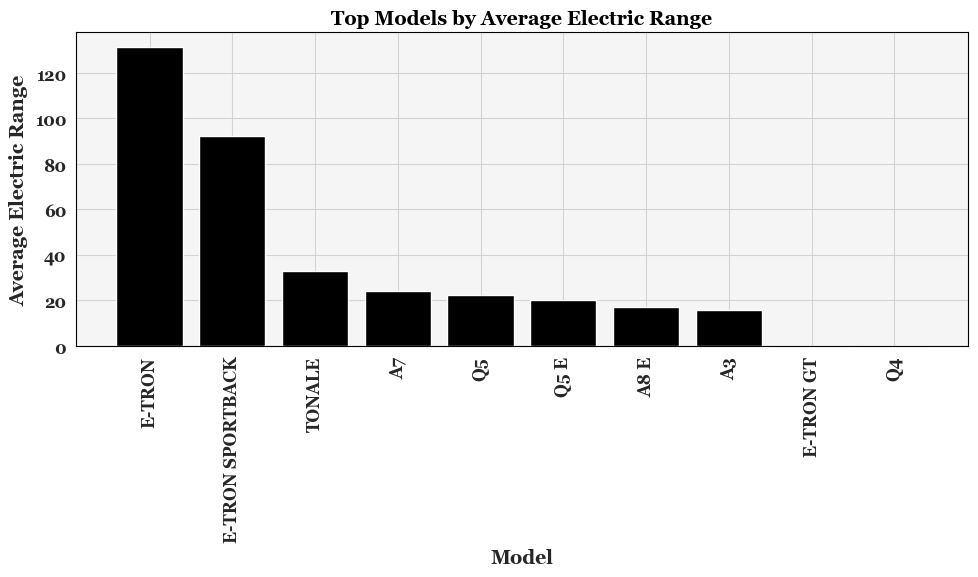

In [69]:

plt.figure(figsize=(10, 6))
plt.bar(sorted_erc['Model'], sorted_erc['Electric Range'],color='black')
plt.xlabel('Model')
plt.ylabel('Average Electric Range')
plt.title('Top Models by Average Electric Range')
plt.xticks(rotation=90)  # Rotate labels if many models
plt.tight_layout()
print("Plotting...")


<h2 style=color:red>The Model with the highest Average Electric charge is Etron and the last is Q4 from the top ten models by average ER</h2>

j)	Are certain vehicle brands more dependent on fast charging infrastructure?

In [24]:
fci_df=df1.groupby('Make')['Electric Range'].mean().reset_index()
sorted_fci=fci_df.sort_values(by='Electric Range',ascending=False)
sorted_fci.head()

,Make,Electric Range
16,JAGUAR,204.254237
39,WHEEGO ELECTRIC CARS,100.000000
35,TH!NK,100.000000
6,CHEVROLET,94.790071
9,FIAT,85.632184


<h2 style=color:red>The Vehicles with the least Electric Charge seem to depend more on fast charging infrastructure compared to EV's with high Electrical Charge</h2>

In [25]:
sorted_fci.tail()

,Make,Electric Range
13,GMC,0.0
22,LUCID,0.0
12,GENESIS,0.0
31,ROLLS ROYCE,0.0
30,RIVIAN,0.0


Plotting...


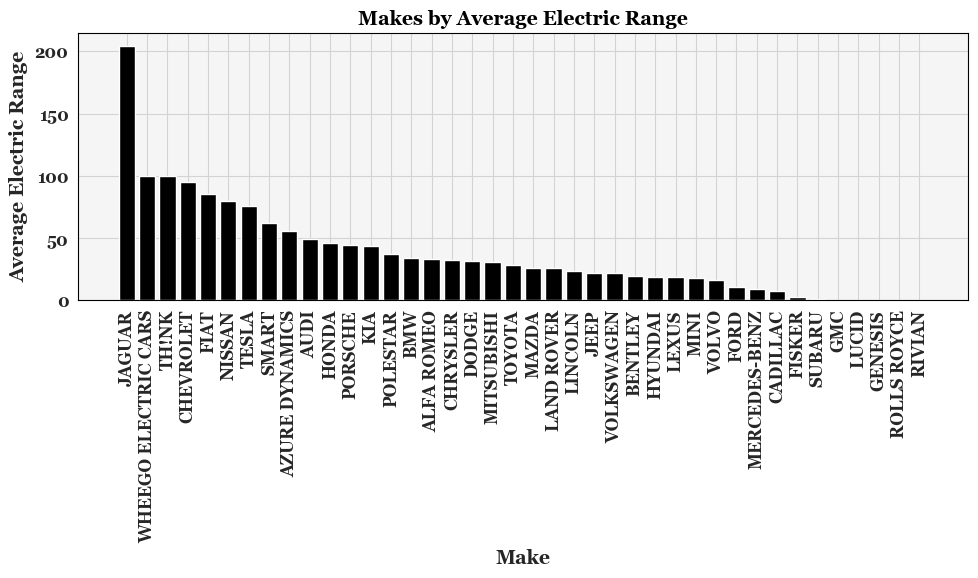

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_fci['Make'], sorted_fci['Electric Range'],color='black')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.title('Makes by Average Electric Range')
plt.xticks(rotation=90)  # Rotate labels if many makes
plt.tight_layout()
print("Plotting...")

<h1>4. Environmental & Policy </h1>

In [27]:
df_wa=df1[df1['State']=='WA']

In [28]:
len(df_wa)

181055

In [29]:
total_vehicles=len(df)
percentage_evs_in_wa = (len(df_wa) / total_vehicles) * 100

print(f"Percentage of Electric Vehicles in Washington State: {percentage_evs_in_wa}%")

Percentage of Electric Vehicles in Washington State: 99.77791003978882%


<h2 style=color:red>Percentage of Electric Vehicles in Washington State: 99.77791003978882%</h2>

<h1>5. Regional Distribution & Ownership Insights </h1>

In [30]:
df1.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


n)	Which counties or cities in Washington have the highest number of EVs?

In [31]:
wa_state_evs=df_wa.groupby(['County','City']).size().reset_index(name='Number of EVS')
sorted_wa_city_evs=wa_state_evs.sort_values(by='Number of EVS',ascending=False)
top_ten_CC=sorted_wa_city_evs.head(10)
top_ten_CC


,County,City,Number of EVS
163,King,Seattle,30045
131,King,Bellevue,9116
159,King,Redmond,6568
39,Clark,Vancouver,6329
147,King,Kirkland,5465
161,King,Sammamish,5350
160,King,Renton,5104
377,Snohomish,Bothell,4754
448,Thurston,Olympia,4397
337,Pierce,Tacoma,3792


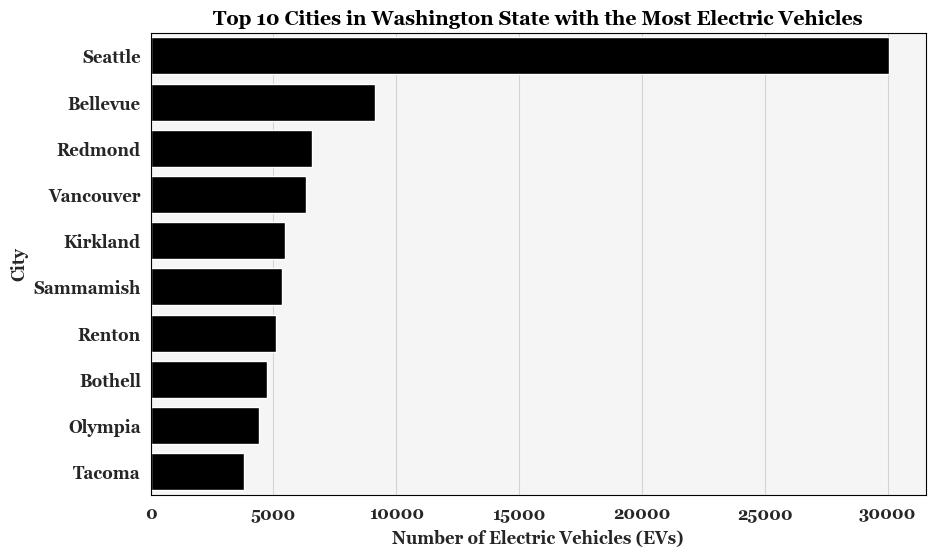

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of EVS', y='City', data=top_ten_CC,color='black')

# Add labels and title
plt.xlabel('Number of Electric Vehicles (EVs)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities in Washington State with the Most Electric Vehicles', fontsize=14)

# Show the plot
plt.show()

<h2 style=color:red>Seattle has the highest number of electric vehicles in washington</h2>

o)	Are there regional disparities in EV adoption? If so, what factors might explain them?

C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\3892700865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( y='County',x='Number of EVS', data=top_ten_CC,width=0.5, palette=custom_palette)
C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\3892700865.py:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( y='County',x='Number of EVS', data=top_ten_CC,width=0.5, palette=custom_palette)


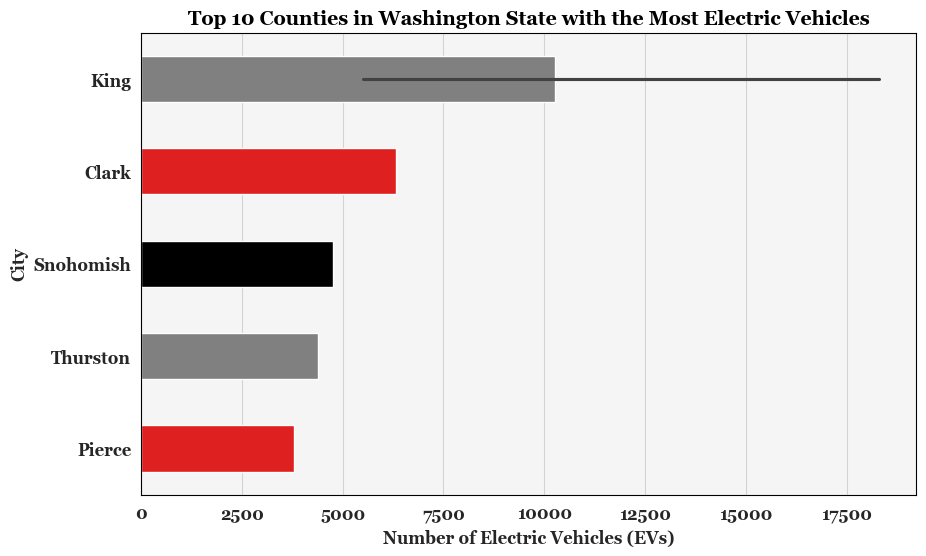

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot( y='County',x='Number of EVS', data=top_ten_CC,width=0.5, palette=custom_palette)

# Add labels and title
plt.xlabel('Number of Electric Vehicles (EVs)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Counties in Washington State with the Most Electric Vehicles', fontsize=14)

# Show the plot
plt.show()

<h2 style=color:red>King County has the highest number of electric vehicles in washington</h2>

In [34]:
cwmcu=df1.groupby(['County','Electric Utility']).size().reset_index(name='Number of charging stations')
cm=cwmcu.sort_values(by='Number of charging stations',ascending=False)
cm

,County,Electric Utility,Number of charging stations
44,King,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),62126
39,King,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),32012
87,Snohomish,PUGET SOUND ENERGY INC,20325
11,Clark,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,10420
74,Pierce,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,7928
...,...,...,...
22,Franklin,BONNEVILLE POWER ADMINISTRATION||COLUMBIA RURA...,1
20,Franklin,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,1
28,Grays Harbor,NO KNOWN ELECTRIC UTILITY SERVICE,1
75,Pierce,BONNEVILLE POWER ADMINISTRATION||PENINSULA LIG...,1


<h2 style=color:red>The big number of EVs can be attributed to big  number of charging stations at King County</h2>

<h1>6. Consumer Preferences & Market Competition </h1>

q)	Which manufacturers dominate the EV market in Washington?

C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\1682100756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dom_brands.values, y=dom_brands.index, palette=custom_palette)
C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\1682100756.py:3: UserWarning: 
The palette list has fewer values (3) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=dom_brands.values, y=dom_brands.index, palette=custom_palette)


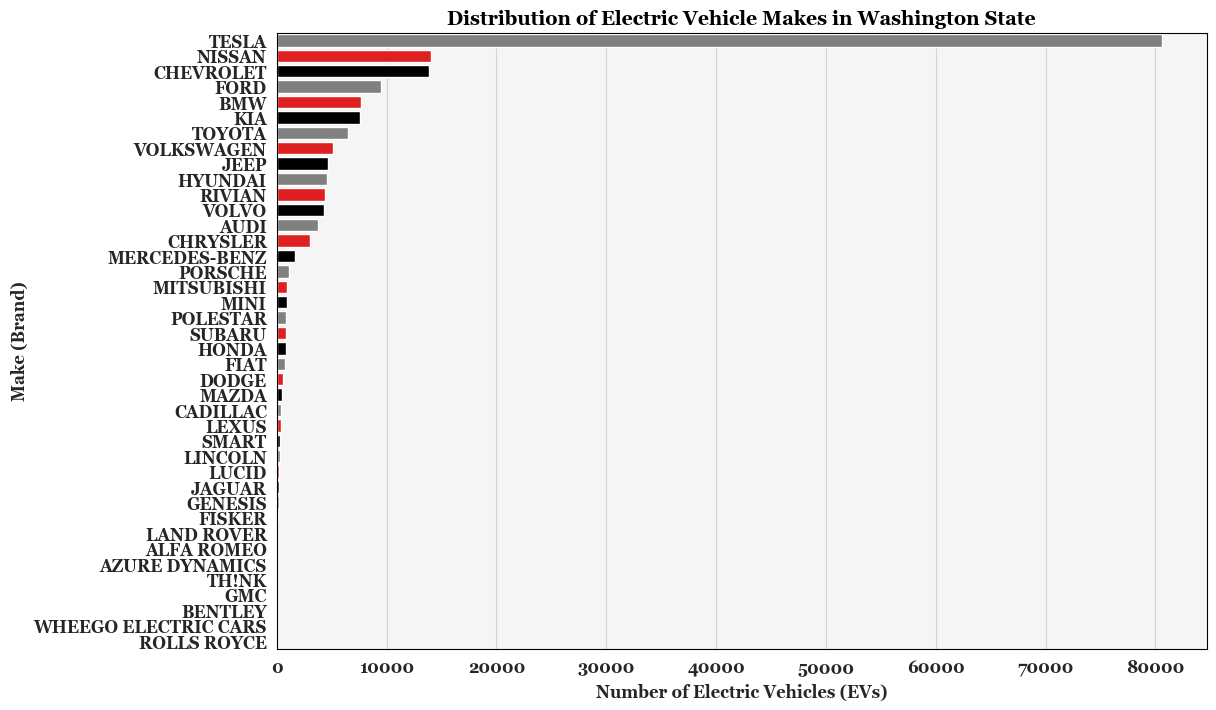

In [76]:
dom_brands=df_wa.Make.value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=dom_brands.values, y=dom_brands.index, palette=custom_palette)
plt.xlabel('Number of Electric Vehicles (EVs)', fontsize=12)
plt.ylabel('Make (Brand)', fontsize=12)
plt.title('Distribution of Electric Vehicle Makes in Washington State', fontsize=14)


plt.show()

<h2 style=color:red>Tesla,Nissan,Chevy,Ford and BMW are the top manufacturers of Electrical vehicles in Wahington</h2>

r)	Are there trends in consumer preferences toward specific brands, battery capacities, or price ranges?

In [36]:
brand_trend=df1.groupby('Make')['Electric Range'].size().reset_index(name='Number of Vehicles')
b_trend=brand_trend.sort_values(by='Number of Vehicles',ascending=False)
b_trend.head()

,Make,Number of Vehicles
34,TESLA,80627
27,NISSAN,14024
6,CHEVROLET,13838
11,FORD,9503
4,BMW,7666


<h2 style=color:red>Consumers are more drawn to Tesla vehicles which can be attributed to high electrical range in  Miles</h2>

In [37]:
bins = [0, 100, 200, float('inf')]
labels = ['Short', 'Medium', 'Long']
df1['Range Category'] = pd.cut(df1['Electric Range'], bins=bins, labels=labels)


C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\2867598342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Range Category'] = pd.cut(df1['Electric Range'], bins=bins, labels=labels)


In [38]:
range_preferences = df1.groupby('Range Category').size().reset_index(name='Number of Vehicles')

print(range_preferences)


  Range Category  Number of Vehicles
0          Short               48839
1         Medium                6571
2           Long               31079


C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\1858678923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_preferences = df1.groupby('Range Category').size().reset_index(name='Number of Vehicles')


In [39]:
b_trends=df1.groupby(['Make','Range Category']).size().reset_index(name='Number of EVS')
sorted_b_trends=b_trends.sort_values(by='Number of EVS',ascending=False)
top_ten_CC1=sorted_b_trends.head(10).drop('Number of EVS',axis='columns')
top_ten_CC1


C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\2243772227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b_trends=df1.groupby(['Make','Range Category']).size().reset_index(name='Number of EVS')


,Make,Range Category
104,TESLA,Long
81,NISSAN,Short
108,TOYOTA,Short
12,BMW,Short
18,CHEVROLET,Short
51,JEEP,Short
20,CHEVROLET,Long
33,FORD,Short
82,NISSAN,Medium
21,CHRYSLER,Short


<h2 style=color:red>Tesla has a Long electrical range followed by nissan with a medium and ER</h2>

s)	How do different brands compare in terms of market share over time?

In [40]:
market_share=df1.groupby('Make')['Model Year'].size().reset_index(name='Number of Models/Year')
sorted_ms=market_share.sort_values(by='Number of Models/Year',ascending=False).head(10)
sorted_ms

,Make,Number of Models/Year
34,TESLA,80627
27,NISSAN,14024
6,CHEVROLET,13838
11,FORD,9503
4,BMW,7666
18,KIA,7632
36,TOYOTA,6485
37,VOLKSWAGEN,5153
17,JEEP,4678
15,HYUNDAI,4552


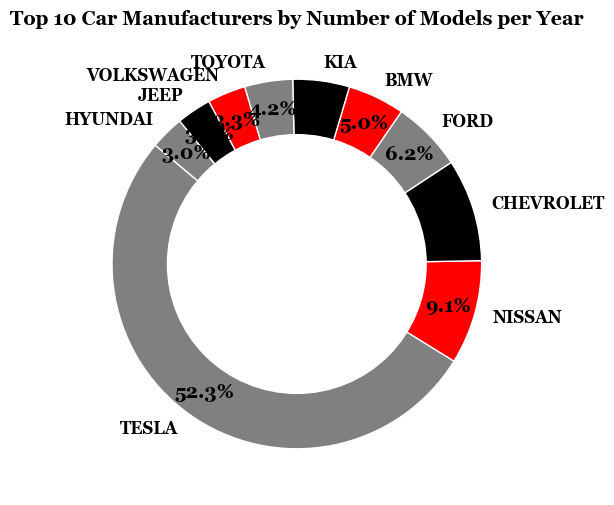

In [77]:

labels = sorted_ms['Make']
sizes = sorted_ms['Number of Models/Year']


plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Top 10 Car Manufacturers by Number of Models per Year')


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

<h2 style=color:red>The donut chart indicates that Tesla holds the highest percentage of manufacturing of electrical vehicles </h2>

<h1>9. Charging Infrastructure & Range Anxiety </h1>

z)	Are there differences in adoption rates for EVs with short vs. long electric ranges?

brand_trend=df1.groupby('Make')['Electric Range'].size().reset_index(name='Number of Vehicles')
b_trend=brand_trend.sort_values(by='Number of Vehicles',ascending=False)
b_trend.head()

<h2 style=color:red>Tesla is well adopted due its long electrical range and the data also indicates that BMW is less adopted </h2>

bb)	Do certain regions have more EVs with longer ranges, possibly due to charging availability?

In [43]:
df1.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Range Category
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Short


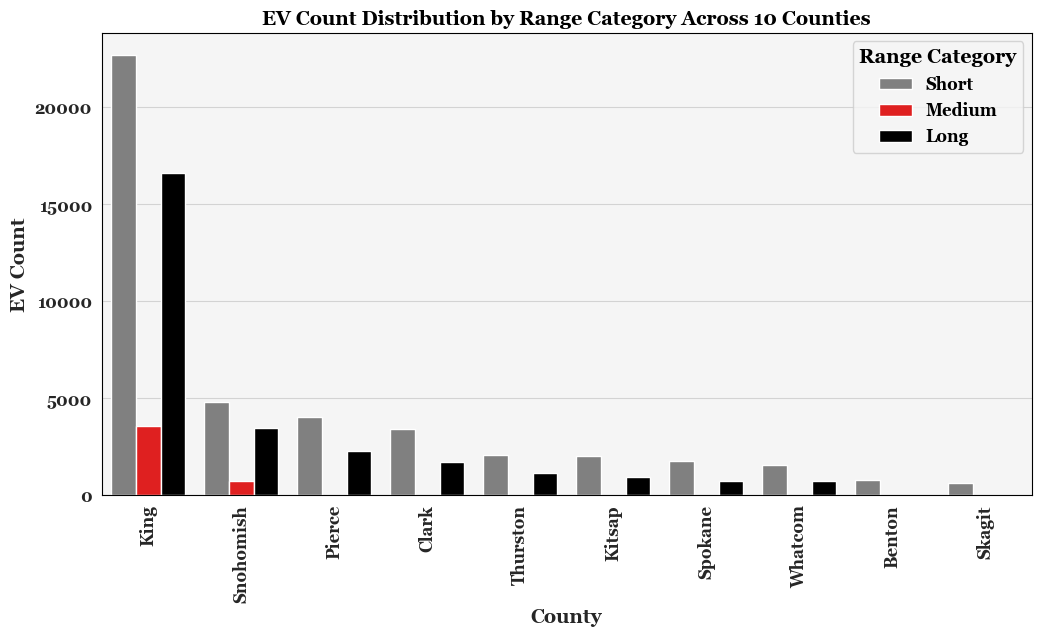

In [78]:
ev_analysis = df1.groupby(['County', 'Range Category'],observed=False).size().reset_index(name='EV Count')
ev_an_sorted=ev_analysis.sort_values(by='EV Count',ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=ev_an_sorted, x='County', y='EV Count', hue='Range Category')
plt.xticks(rotation=90)
plt.title('EV Count Distribution by Range Category Across 10 Counties')
plt.show()


In [45]:
df_filtered = df1[df1['Model Year'] >= 2015]
market_share_trend = df_filtered.groupby(['Model Year', 'Make']).size().reset_index(name='Model Count')
market_share_trend['Total Models Yearly'] = market_share_trend.groupby('Model Year')['Model Count'].transform('sum')
market_share_trend['Market Share (%)'] = (market_share_trend['Model Count'] / market_share_trend['Total Models Yearly']) * 100


In [46]:
market_share_trend['Market Share (%)'] .head()

0     8.246564
1     9.558517
2     4.685548
3    11.057893
4     0.416493
Name: Market Share (%), dtype: float64

<h1>10. Brand Loyalty & Manufacturer Competition </h1>

ee)	How does Tesla compare to traditional automakers like Ford, GM, and Nissan in terms of market penetration?

<h1>11. Demographics & Socioeconomic Factors </h1>

gg)	Are EVs more common in urban, suburban, or rural areas?

hh)	Do certain communities prefer BEVs over PHEVs, and why?

<h1>13. Second-Hand Market & Vehicle Lifespan </h1>

ll)	What is the average age of EVs currently in use?

In [47]:
df_curr=2025
df1['age']=df_curr-df1['Model Year']

C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\1034130628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age']=df_curr-df1['Model Year']


In [48]:
df_age_av=df1['age'].mean()

In [49]:
print(f'The average age of EV is {df_age_av}')

The average age of EV is 4.416657921626025


mm)	Are older EVs still widely used, or do consumers upgrade frequently?

In [50]:

bins = [0, 3, 6]
labels = ['New', 'Mid-Age', 'Older']

df1['Age Category'] = pd.cut(df1['age'], bins=bins + [float('inf')], labels=labels)

# Group by Age Category and count the number of vehicles
age_distribution = df1.groupby('Age Category',observed=True).size().reset_index(name='Number of Vehicles')

print(age_distribution)


  Age Category  Number of Vehicles
0          New               95962
1      Mid-Age               41681
2        Older               43412


C:\Users\XXXX\AppData\Local\Temp\ipykernel_18440\2825594655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age Category'] = pd.cut(df1['age'], bins=bins + [float('inf')], labels=labels)


Plotting...


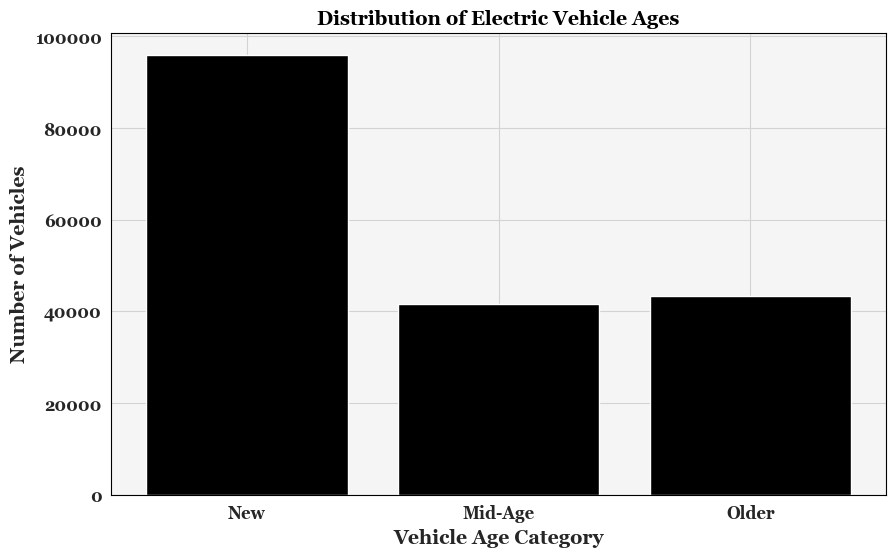

In [79]:
plt.figure(figsize=(10,6))
plt.bar(age_distribution['Age Category'], age_distribution['Number of Vehicles'],color='black')
plt.xlabel('Vehicle Age Category')
plt.ylabel('Number of Vehicles')
plt.title("Distribution of Electric Vehicle Ages")
print("Plotting...")


<h2 style=color:red>There is wide usage of new vehicles with a small difference between mid-aged and older vehicles which means they are still in use 
lesser compared to the new models</h2>